In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
titanic_data = pd.read_csv('data/train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


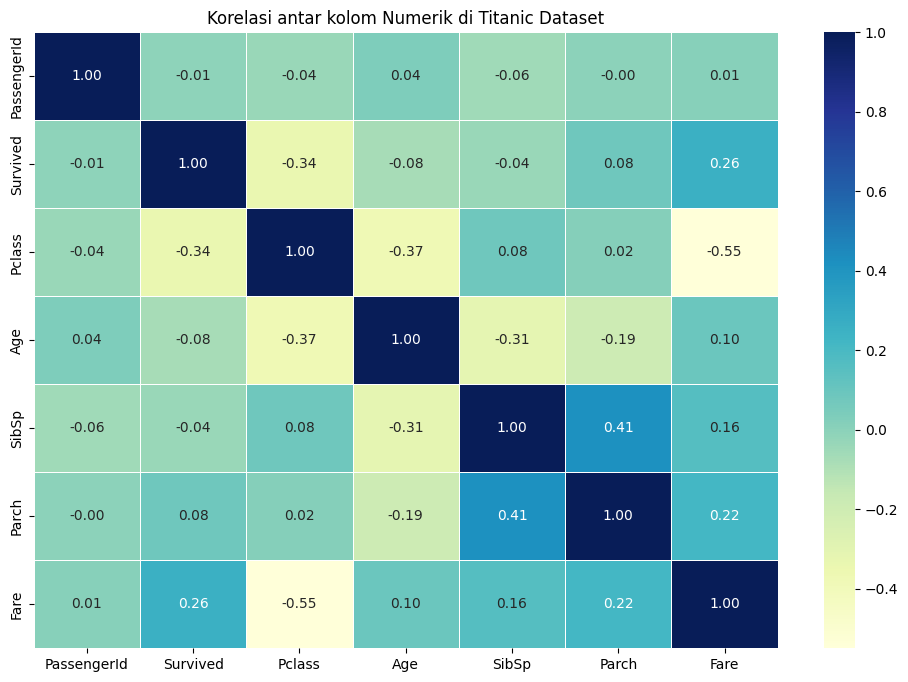

In [3]:
import seaborn as sns
numeric_columns = titanic_data.select_dtypes(include=['float64', 'int64'])

#hitung korelasi 
correlation_matrix= numeric_columns.corr()

#peta panasss
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="YlGnBu",annot=True,fmt=".2f", linewidths=.5)
plt.title("Korelasi antar kolom Numerik di Titanic Dataset")
plt.show()

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, tes_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
    start_train_set = titanic_data.loc[train_indices]
    start_test_set = titanic_data.loc[tes_indices]

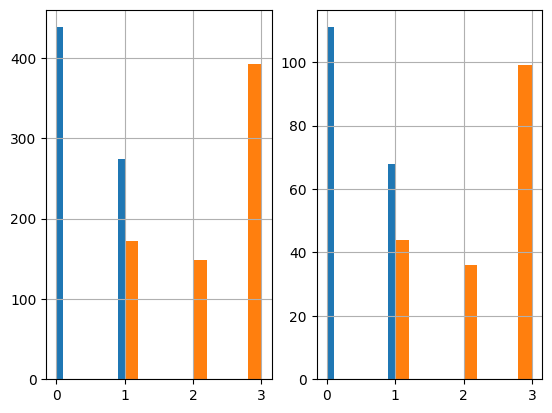

In [5]:
plt.subplot(1,2,1)
start_train_set['Survived'].hist()
start_train_set['Pclass'].hist()

plt.subplot(1,2,2)
start_test_set['Survived'].hist()
start_test_set['Pclass'].hist()

plt.show()



In [6]:
start_train_set.info()


<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 857 to 575
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          568 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        167 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [7]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X , y=None):
        return self
    
    def transform(self,X):
        imputer = SimpleImputer(strategy="mean")
        X_copy = X.copy()
        X_copy['Age'] = imputer.fit_transform(X[['Age']])
        return X_copy

In [8]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()
        
        column_names = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[column_names[i]]= matrix.T[i]
        
        matrix = encoder.fit_transform(X[['Sex']]).toarray()
            
        column_names = ["Female", "Male"]
        
        for i in range (len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        
        return X

In [9]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1,errors="ignore")

In [10]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("ageimputer", AgeImputer()),
                      ("featureencoder", FeatureEncoder()),
                      ("featuredropper", FeatureDropper())])

In [11]:
start_train_set = pipeline.fit_transform(start_train_set)

In [12]:
start_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
857,858,1,1,51.0,0,0,26.550,0.0,0.0,1.0,0.0,1.0
392,393,0,3,28.0,2,0,7.925,0.0,0.0,1.0,0.0,1.0
348,349,1,3,3.0,1,1,15.900,0.0,0.0,1.0,0.0,1.0
708,709,1,1,22.0,0,0,151.550,0.0,0.0,1.0,1.0,0.0
383,384,1,1,35.0,1,0,52.000,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,695,0,1,60.0,0,0,26.550,0.0,0.0,1.0,0.0,1.0
372,373,0,3,19.0,0,0,8.050,0.0,0.0,1.0,0.0,1.0
759,760,1,1,33.0,0,0,86.500,0.0,0.0,1.0,1.0,0.0
660,661,1,1,50.0,2,0,133.650,0.0,0.0,1.0,0.0,1.0


In [13]:
start_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 857 to 575
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [14]:
from sklearn.preprocessing import StandardScaler

X = start_train_set.drop(['Survived'], axis= 1)
y = start_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid=[
    {"n_estimators": [10,100,200,500],"max_depth":[None,5,10], "min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(clf, param_grid, cv=3 , scoring="accuracy", return_train_score=True)
grid_search.fit(X_data,y_data)

In [ ]:
final_clf= grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(min_samples_split=3)

In [ ]:
start_test_set = pipeline.fit_transform(start_test_set)

In [ ]:
x_test= start_test_set.drop(['Survived'], axis=1)
y_test= start_test_set['Survived']

scaler =StandardScaler()
X_data_test = scaler.fit_transform(x_test)
y_data_test = y_test.to_numpy()

In [ ]:
final_clf.score(X_data_test,y_data_test)

0.8044692737430168

In [ ]:
final_data = pipeline.fit_transform(titanic_data)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
x_final = final_data.drop(['Survived'],axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(x_final)
y_data_final = y_final.to_numpy()

In [ ]:
prod_clf = RandomForestClassifier()

param_grid=[
    {"n_estimators": [10,100,200,500],"max_depth":[None,5,10], "min_samples_split":[2,3,4]}
]
grid_search = GridSearchCV(clf, param_grid, cv=3 , scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3)

In [ ]:
titanic_test_data = pd.read_csv("data/test.csv")

In [ ]:
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [ ]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method="ffill")

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [ ]:
predictions = prod_final_clf.predict(X_data_final_test)


In [ ]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("data/predictions.csv", index=False)

In [ ]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
